# **Compare simple classifiers (Wine, Iris)**

Quistian Navarro Juan Luis \
A341807@alumnos.uaslp.mx \
Ing. Sistemas Inteligentes, Gen 2021 \
Machine Learning, Group 281601

### 02/25/24

## **Abstratc**

In this booklet, the classification methods: Decision trees, Naive Bayes and k-Nearest neighbors are shown comparatively.
Compare the performance (confusion matrix and classification error) of different methods for the classification task using two different data sets: Wine and Iris.
Use two options for splitting: \
a) 80% training and 20% testing. \
b) 50% training and 50% testing.

In [424]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

In [425]:
#visulize tree
from io import StringIO
import pydotplus 
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

### **Iris dataset**

In [426]:
iris = load_iris()

In [427]:
X_iris = iris.data
y_iris = iris.target


#### a ) 80% training and 20% testing 

In [428]:
X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris = train_test_split(X_iris, y_iris, test_size=0.5, random_state=42)

### b) 50% training and 50% testing

In [429]:
X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

### **Wine dataset**

In [430]:
wine = load_wine()

In [431]:
# Split datasets into features (X) and labels (y)
X_wine = wine.data
y_wine = wine.target

#### a ) 80% training and 20% testing 

In [432]:
X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine = train_test_split(X_wine, y_wine, test_size=0.5, random_state=42)

### b) 50% training and 50% testing

In [433]:
X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

### function to train and evaluate a classifier

In [434]:
def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    # train
    classifier.fit(X_train, y_train)

    # predict
    y_pred = classifier.predict(X_test)

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    # confusion matriz
    cm = confusion_matrix(y_test, y_pred)

    return acc, cm

## **Decision trees ID3**

Entropy: The amount of information disorder or amount of randomness in the nodes (amount of impurity).

The formula for the entropy of any given attribute, $A_k$, is given as: 

$$
    H(C|A_k) = \sum_{j=1}^{M_k} p(a_k,_j) \cdot [- \sum_{i=1}^{N} p(c_i|a_k,j) \cdot \mathbf{log_2} p(c_i|a_k,_j)]
$$

$H(C|A_k) =$ entropy of the classification property of attribute $A_k$ \
$p(a_k,_j) =$ probability of attribute $k$ being at value $j$\
$p(c_i|a_k,_j) =$ probabilty that the class vlaue is $c_i$ when attribute $k$ is at its $jth$ value\
$M_k = $ total number of values for atribute $A_k; j = 1,2, ..., M_k$\
$N = $ total number of different classes (or outcomes);\
$i = 1, 2, ...., N$\
$K = $ total number of attributes; $k = 1,2,..., k$

### wine 50% train 

In [435]:
tree_classifier_wine = DecisionTreeClassifier()

In [436]:
tree_acc_50_wine, tree_cm_50_wine = train_and_evaluate(tree_classifier_wine, X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [437]:
print("Results for Wine with 50% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_50_wine)
print("Decision tree - Confusion matrix:")
print(tree_cm_50_wine)

Results for Wine with 50% of training and testing data:
Decision tree - Accuracy: 0.9101123595505618
Decision tree - Confusion matrix:
[[29  4  0]
 [ 3 31  0]
 [ 0  1 21]]


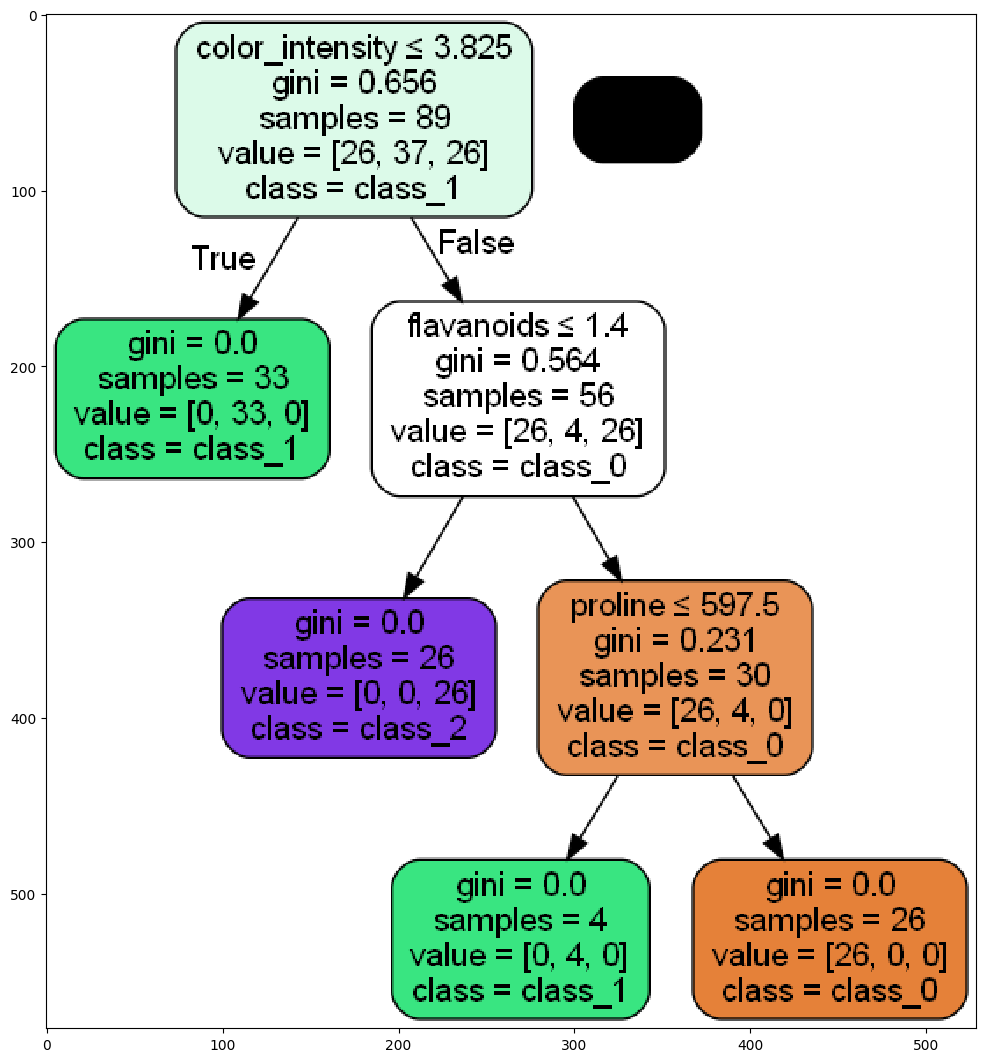

In [438]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_wine, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=wine.feature_names, 
                      class_names=[str(target) for target in wine.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

### wine 80% train 

In [439]:
tree_classifier_wine = DecisionTreeClassifier()

In [440]:
tree_acc_80_wine, tree_cm_80_wine = train_and_evaluate(tree_classifier_wine, X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [441]:
print("Results for Wine with 80% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_80_wine)
print("Decision tree - Confusion matrix:")
print(tree_cm_80_wine)

Results for Wine with 80% of training and testing data:
Decision tree - Accuracy: 0.9444444444444444
Decision tree - Confusion matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


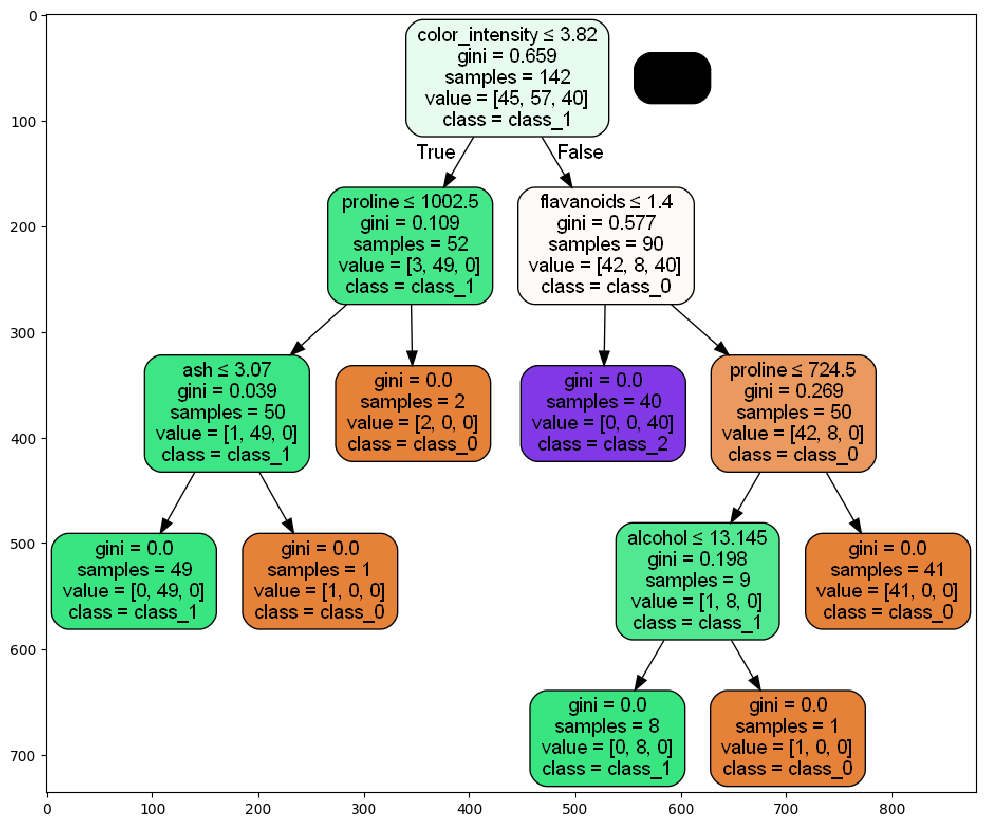

In [442]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_wine, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=wine.feature_names, 
                      class_names=[str(target) for target in wine.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

### iris 50%

In [443]:
tree_classifier_iris = DecisionTreeClassifier()

In [444]:
tree_acc_50_iris, tree_cm_50_iris = train_and_evaluate(tree_classifier_iris, X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [445]:
print("Results for Iris with 50% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_50_iris)
print("Decision tree - Confusion matrix:")
print(tree_cm_50_iris)

Results for Iris with 50% of training and testing data:
Decision tree - Accuracy: 0.9333333333333333
Decision tree - Confusion matrix:
[[29  0  0]
 [ 0 20  3]
 [ 0  2 21]]


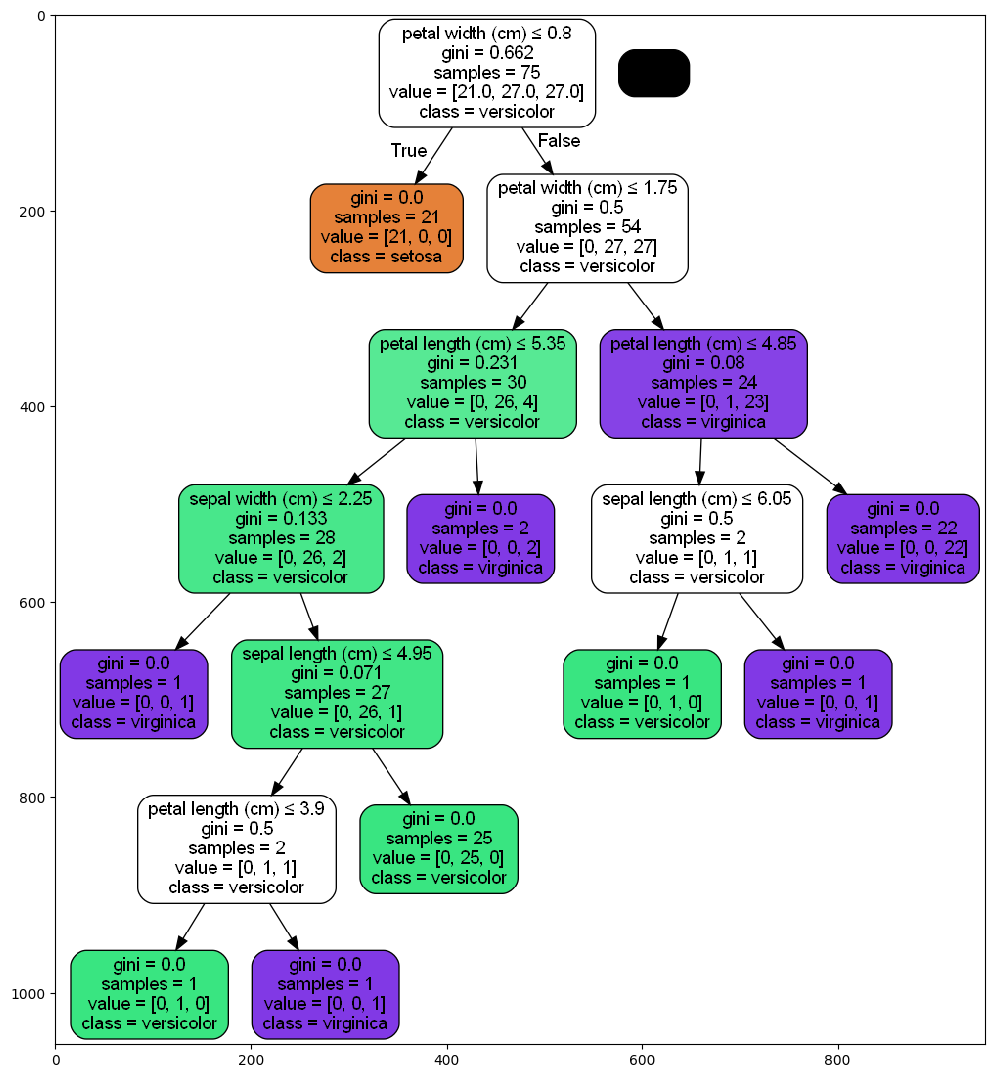

In [446]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_iris, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=iris.feature_names, 
                      class_names=[str(target) for target in iris.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

### iris 80%

In [447]:
tree_classifier_iris = DecisionTreeClassifier()

In [448]:
tree_acc_80_iris, tree_cm_80_iris = train_and_evaluate(tree_classifier_iris, X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [449]:
print("Results for Iris with 80% of training and testing data:")
print("Decision tree - Accuracy:", tree_acc_80_iris)
print("Decision tree - Confusion matrix:")
print(tree_cm_80_iris)

Results for Iris with 80% of training and testing data:
Decision tree - Accuracy: 1.0
Decision tree - Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


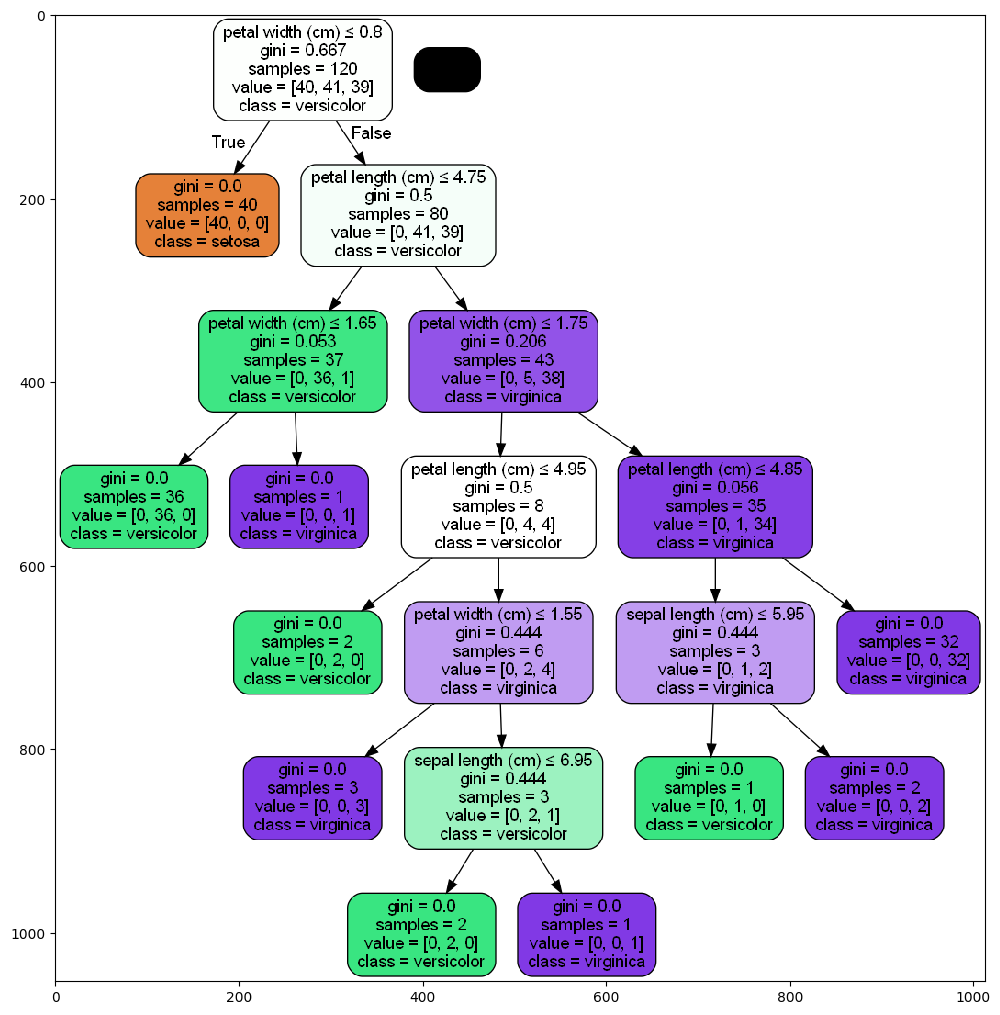

In [450]:
dot_data = StringIO()
filename = "tree.png"
out = tree.export_graphviz(tree_classifier_iris, out_file=dot_data, 
                      filled=True, rounded=True, special_characters=True,
                      feature_names=iris.feature_names, 
                      class_names=[str(target) for target in iris.target_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(12,15))
plt.imshow(img,interpolation='nearest')

## **naïve Bayes**

The assumption of the naive classifier is that the attributes are independent of each other with respect to the concept
are independent of each other with respect to the target concept
and, therefore, they are independent of the target concept:

$$
    P(a_i,a_2,...,a_n|v_j) = \prod_{i} P(a_i|v_j)
$$

The naive Bayesian classifier approach is:

$$
    v_nb = \arg \max_{v_j \in V} P(v_j) \prod_{i} P(a_i|v_j)
$$

The probabilities $P(a_i|v_j)$ are much easier to estimate than $P(a_i,a_2,...a_n)$

### wine 50% 

In [451]:
naive_bayes_classifier_wine = GaussianNB()

In [452]:
nb_acc_50_wine, nb_cm_50_wine = train_and_evaluate(naive_bayes_classifier_wine, X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [453]:
print("Results for Wine with 50% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_50_wine)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_50_wine)

Results for Wine with 50% of training and testing data:
Naive Bayes - Accuracy: 0.9887640449438202
Naive Bayes- Confusion matrix:
[[32  1  0]
 [ 0 34  0]
 [ 0  0 22]]


### wine 80%

In [454]:
naive_bayes_classifier_wine = GaussianNB()

In [455]:
nb_acc_80_wine, nb_cm_80_wine = train_and_evaluate(naive_bayes_classifier_wine, X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [456]:
print("Results for Wine with 80% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_80_wine)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_80_wine)

Results for Wine with 80% of training and testing data:
Naive Bayes - Accuracy: 1.0
Naive Bayes- Confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Iris 50%

In [457]:
naive_bayes_classifier_iris = GaussianNB()

In [458]:
nb_acc_50_iris, nb_cm_50_iris = train_and_evaluate(naive_bayes_classifier_iris, X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [459]:
print("Results for Iris with 50% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_50_iris)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_50_iris)

Results for Iris with 50% of training and testing data:
Naive Bayes - Accuracy: 0.9866666666666667
Naive Bayes- Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]


### Iris 80%

In [460]:
naive_bayes_classifier_wine = GaussianNB()

In [461]:
nb_acc_80_iris, nb_cm_80_iris = train_and_evaluate(naive_bayes_classifier_wine, X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [462]:
print("Results for Iris with 80% of training and testing data:")
print("Naive Bayes - Accuracy:", nb_acc_80_iris)
print("Naive Bayes- Confusion matrix:")
print(nb_cm_80_iris)

Results for Iris with 80% of training and testing data:
Naive Bayes - Accuracy: 1.0
Naive Bayes- Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##  **k-Nearest neighbors**

- Non-parametric, meaning that it does not make explicit assumptions about the functional form of the data, avoiding mis-modeling the underlying distribution of the data.

- It memorizes the training instances that are later used as "knowledge" for the prediction phase.

- The minimal training phase of KNN is performed at both a memory cost, since we must store a potentially huge dataset, and a computational cost during test time, since the classification of a given observation requires an exhaustion of the entire dataset. 

### Find nearest similar points
The distance between points is found, using one of the distance measures:

- Euclidean distance:

$$
    \sqrt{\sum_{i=1}^{k} (\mathbf{x_i} - \mathbf{y_i})^2}    
$$
- Manhattan distance:
$$
    \sum_{i=1}^{k} |\mathbf{x_i} - \mathbf{y_i}|
$$
- Minkowski Distance
$$
    [\sum_{i=1}^{k} (|\mathbf{x_i} - \mathbf{y_i}|)^4]^{1/4}
$$

1. Calculate the distance
2. Find its nearest neighbors
3. Vote for the labels

**Define the value of K** 
* The number of neighbors (K) is a hyperparameter to be chosen at the time of model construction.
* The number of neighbors (K) is a hyperparameter to be chosen at the time of model construction.
* There is no optimal number of neighbors that fits all types of datasets, each dataset has its own requirements.
* A small number of neighbors will have a low skewness but a high variance, and a large number of neighbors will have a lower variance but a higher skewness.

funtion select the best parameter to k

In [463]:
from sklearn.model_selection import GridSearchCV
def find_best_parameter_k (classifier, X_train, X_test, y_train, y_test):
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]} 

    grid_search = GridSearchCV(classifier, param_grid, cv=5)

    grid_search.fit(X_train, y_train)

    best_k = grid_search.best_params_['n_neighbors']

    best_knn = KNeighborsClassifier(n_neighbors=best_k, metric= 'minkowski', p=2)

    best_knn.fit(X_train, y_train)

    y_pred = best_knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    return acc, cm, best_k

### wine 50%

In [464]:
knn = KNeighborsClassifier()

In [465]:
knn_acc_50_wine, knn_cm_50_wine, knn_best_k_wine_50 = find_best_parameter_k(knn, X_train_50_wine, X_test_50_wine, y_train_50_wine, y_test_50_wine)

In [466]:
print("Results for wine with 50% of training and testing data:")
print("Best k:", knn_best_k_wine_50)
print("Knn - Accuracy:", knn_acc_50_wine)
print("Knn - Confusion matrix:")
print(knn_cm_50_wine)

Results for wine with 50% of training and testing data:
Best k: 14
Knn - Accuracy: 0.6629213483146067
Knn - Confusion matrix:
[[27  0  6]
 [ 1 20 13]
 [ 0 10 12]]


### wine 80%

In [467]:
knn = KNeighborsClassifier()

In [468]:
knn_acc_80_wine, knn_cm_80_wine, knn_best_k_wine_80 = find_best_parameter_k(knn, X_train_80_wine, X_test_80_wine, y_train_80_wine, y_test_80_wine)

In [469]:
print("Results for wine with 80% of training and testing data:")
print("Best k:", knn_best_k_wine_80)
print("Knn - Accuracy:", knn_acc_80_wine)
print("Knn - Confusion matrix:")
print(knn_cm_80_wine)

Results for wine with 80% of training and testing data:
Best k: 17
Knn - Accuracy: 0.7777777777777778
Knn - Confusion matrix:
[[14  0  0]
 [ 0  9  5]
 [ 1  2  5]]


### Iris 50%

In [470]:
knn = KNeighborsClassifier()

In [471]:
knn_acc_50_iris, knn_cm_50_iris, knn_best_k_iris_50 = find_best_parameter_k(knn, X_train_50_iris, X_test_50_iris, y_train_50_iris, y_test_50_iris)

In [472]:
print("Results for Iris with 50% of training and testing data:")
print("Best k:", knn_best_k_iris_50)
print("Knn - Accuracy:", knn_acc_50_iris)
print("Knn - Confusion matrix:")
print(knn_cm_50_iris)

Results for Iris with 50% of training and testing data:
Best k: 17
Knn - Accuracy: 0.96
Knn - Confusion matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]


### iris 80%

In [473]:
knn = KNeighborsClassifier()

In [474]:
knn_acc_80_iris, knn_cm_80_iris, knn_best_k_iris_80 = find_best_parameter_k(knn, X_train_80_iris, X_test_80_iris, y_train_80_iris, y_test_80_iris)

In [475]:
print("Results for Iris with 80% of training and testing data:")
print("Best k:", knn_best_k_iris_80)
print("Knn - Accuracy:", knn_acc_80_iris)
print("Knn - Confusion matrix:")
print(knn_cm_80_iris)

Results for Iris with 80% of training and testing data:
Best k: 3
Knn - Accuracy: 1.0
Knn - Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Dataset: Wine Training: 50% Testing: 50%

In [476]:
acc = [tree_acc_50_wine, nb_acc_50_wine, knn_acc_50_wine]
models = ['Decision tree', 'Naive Bayes', 'K-NN']
best_ks = ['', '', knn_best_k_wine_50]
data = {
    'Classifier': models,
    'best k parameter': best_ks,
    'Accuracy': acc
}

table_df1 = pd.DataFrame(data)

table_df1

,Classifier,best k parameter,Accuracy
0,Decision tree,,0.910112
1,Naive Bayes,,0.988764
2,K-NN,14,0.662921


### Dataset: Wine Training: 80% Testing: 20%

In [477]:
acc = [tree_acc_80_wine, nb_acc_80_wine, knn_acc_80_wine]
models = ['Decision tree', 'Naive Bayes', 'K-NN']
best_ks = ['', '', knn_best_k_wine_80]
data = {
    'Classifier': models,
    'best k parameter': best_ks,
    'Accuracy': acc
}

table_df2 = pd.DataFrame(data)

table_df2

,Classifier,best k parameter,Accuracy
0,Decision tree,,0.944444
1,Naive Bayes,,1.000000
2,K-NN,17,0.777778


### Dataset: Iris Training: 50% Testing: 50%

In [478]:
acc = [tree_acc_50_iris, nb_acc_50_iris, knn_acc_50_iris]
models = ['Decision tree', 'Naive Bayes', 'K-NN']
best_ks = ['', '', knn_best_k_iris_50]
data = {
    'Classifier': models,
    'best k parameter': best_ks,
    'Accuracy': acc
}

table_df3 = pd.DataFrame(data)

table_df3

,Classifier,best k parameter,Accuracy
0,Decision tree,,0.933333
1,Naive Bayes,,0.986667
2,K-NN,17,0.960000


### Dataset: Iris Training: 80% Testing: 20%

In [479]:
acc = [tree_acc_80_iris, nb_acc_80_iris, knn_acc_80_iris]
models = ['Decision tree', 'Naive Bayes', 'K-NN']
best_ks = ['', '', knn_best_k_iris_80]
data = {
    'Classifier': models,
    'best k parameter': best_ks,
    'Accuracy': acc
}

table_df4 = pd.DataFrame(data)

table_df4

,Classifier,best k parameter,Accuracy
0,Decision tree,,1.0
1,Naive Bayes,,1.0
2,K-NN,3,1.0


## **Conclusions**

In the case of the Wine data set (50% and 50%), the best classifier is Naive Bayes with 98% accuracy; for (80% and 20%), Naive Bayes is also the best with 1 accuracy.

While for Iris (50% and 50%), the best is Naive Bayes with 98%, and for (80% and 20%) there is a tie with the three classifiers with 100%.